In [106]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [107]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

In [108]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices


(tensor([ 1,  6,  0,  2,  7,  3, 10,  8,  4]), tensor([9, 5]))

In [109]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


In [110]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # args: input size, output size, bias defaulting to True
linear_model(t_un_val)

tensor([[4.3210],
        [3.4708]], grad_fn=<AddmmBackward0>)

In [111]:
linear_model.weight

Parameter containing:
tensor([[0.7393]], requires_grad=True)

In [112]:
linear_model.bias

Parameter containing:
tensor([-0.1446], requires_grad=True)

In [113]:
x = torch.ones(1)
linear_model(x)

tensor([0.5947], grad_fn=<ViewBackward0>)

In [114]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947],
        [0.5947]], grad_fn=<AddmmBackward0>)

In [115]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
linear_model.parameters(),
lr=1e-2)

In [116]:
linear_model.parameters()

<generator object Module.parameters at 0x723200397920>

In [117]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9629]], requires_grad=True),
 Parameter containing:
 tensor([-0.1593], requires_grad=True)]

In [118]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [119]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
n_epochs = 10000,
optimizer = optimizer,
model = linear_model,
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 119.6061, Validation loss 50.9206


Epoch 1000, Training loss 3.3813, Validation loss 4.0850
Epoch 2000, Training loss 2.8631, Validation loss 3.9757
Epoch 3000, Training loss 2.8541, Validation loss 3.9680
Epoch 4000, Training loss 2.8539, Validation loss 3.9671
Epoch 5000, Training loss 2.8539, Validation loss 3.9670
Epoch 6000, Training loss 2.8539, Validation loss 3.9670
Epoch 7000, Training loss 2.8539, Validation loss 3.9670
Epoch 8000, Training loss 2.8539, Validation loss 3.9670
Epoch 9000, Training loss 2.8539, Validation loss 3.9670
Epoch 10000, Training loss 2.8539, Validation loss 3.9670

Parameter containing:
tensor([[5.4310]], requires_grad=True)
Parameter containing:
tensor([-17.2885], requires_grad=True)


In [120]:
seq_model = nn.Sequential(
nn.Linear(1, 13),
nn.Tanh(),
nn.Linear(13, 1))

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [121]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [122]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [123]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
('hidden_linear', nn.Linear(1, 8)),
('hidden_activation', nn.Tanh()),
('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [124]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [125]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.1000], requires_grad=True)

In [126]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,
loss_fn = nn.MSELoss(),
t_u_train = t_un_train,
t_u_val = t_un_val,
t_c_train = t_c_train,
t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 216.4225, Validation loss 130.1237
Epoch 1000, Training loss 4.3903, Validation loss 4.4782
Epoch 2000, Training loss 3.5658, Validation loss 11.3337
Epoch 3000, Training loss 2.0662, Validation loss 6.7272
Epoch 4000, Training loss 1.7884, Validation loss 5.4180
Epoch 5000, Training loss 1.7403, Validation loss 5.3177
output tensor([[15.1943],
        [ 7.2936]], grad_fn=<AddmmBackward0>)
answer tensor([[13.],
        [ 8.]])
hidden tensor([[-7.3983e+00],
        [ 1.2326e+01],
        [ 4.1625e-01],
        [-6.2250e-01],
        [ 7.0361e-03],
        [ 1.2606e+01],
        [ 2.0789e-02],
        [-1.1641e+01]])


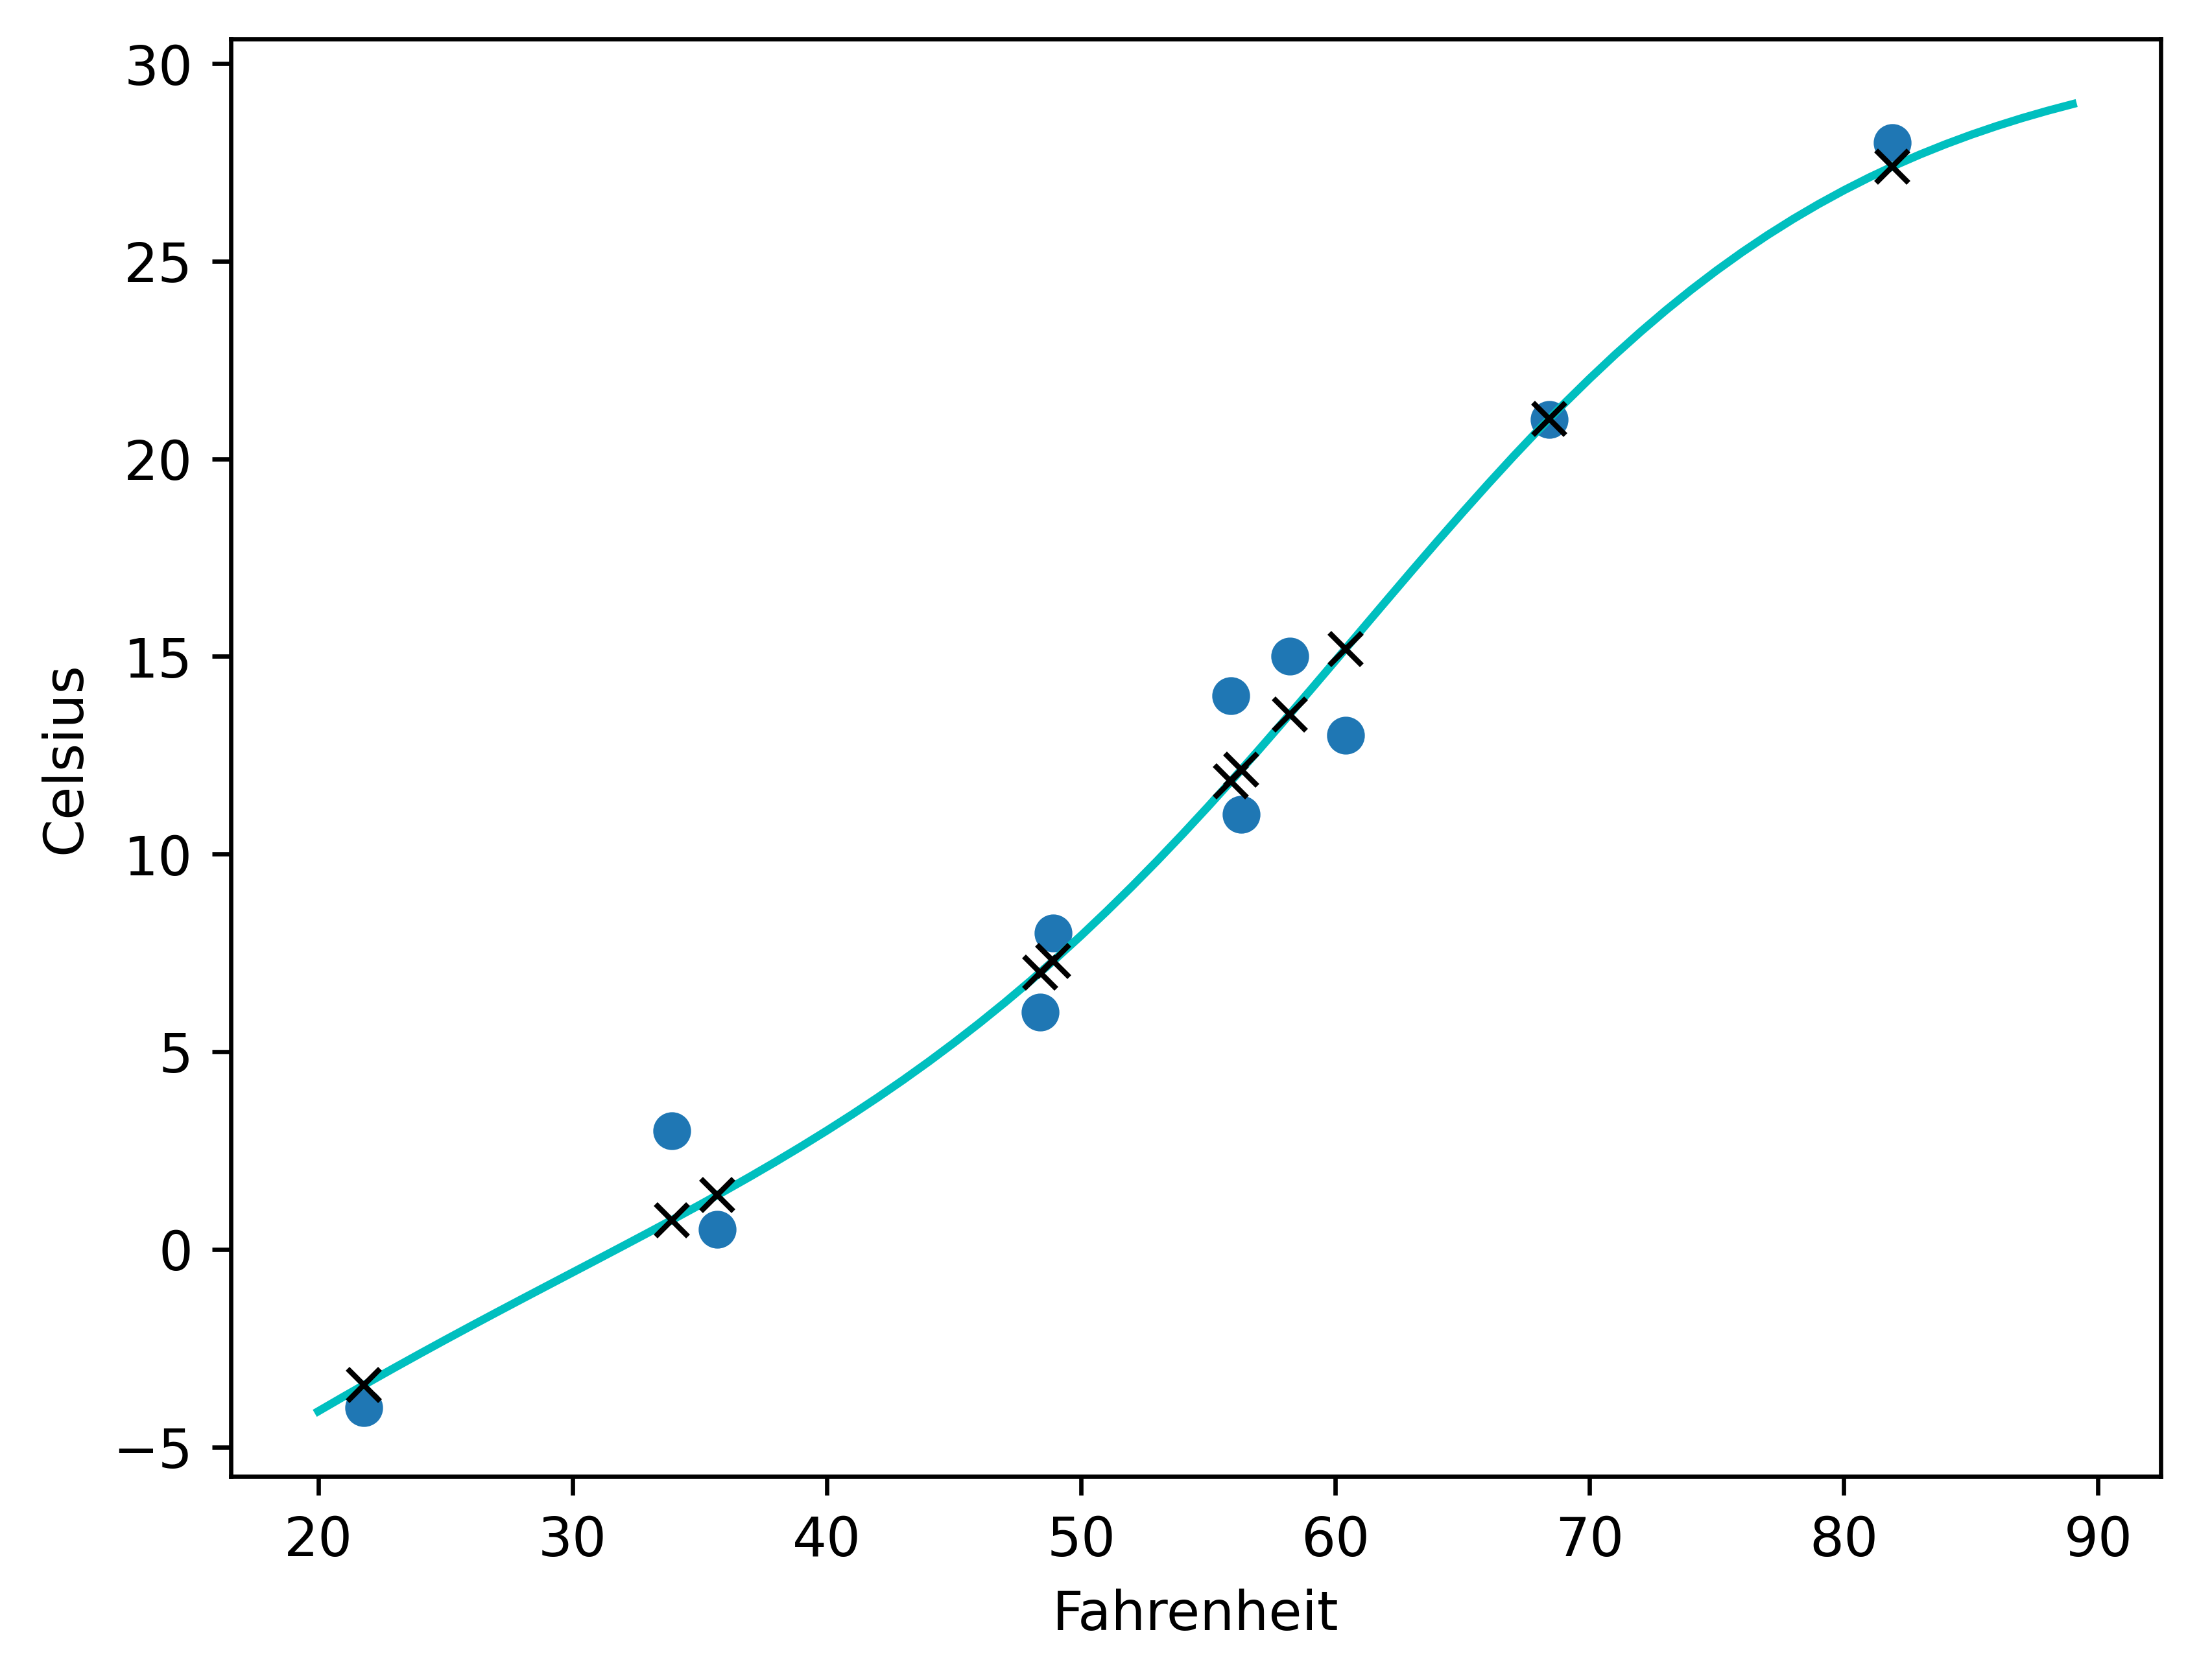

In [127]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')